In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [29]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [30]:
inspector = inspect(engine)

In [31]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [32]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

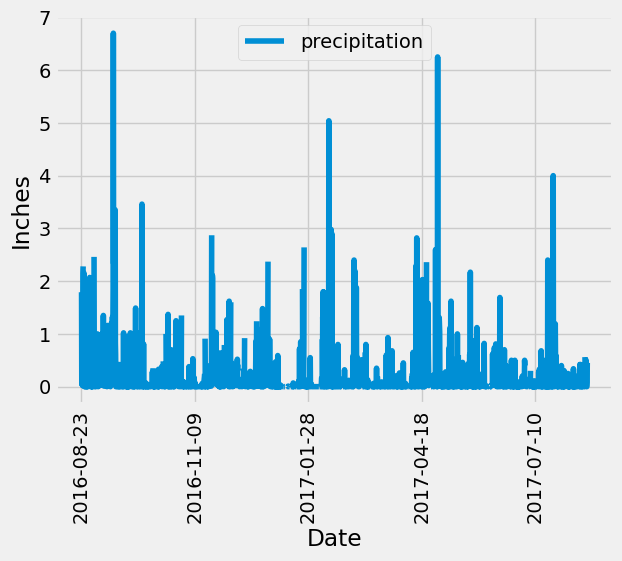

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
past_year_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= dt.date(2016, 8 , 23)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(past_year_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
sorted_measurement = measurement_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
sorted_measurement.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")


In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_measurement.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [36]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(station.station).count()
number_of_stations

# Alternate method
number_of_stations = session.query(measurement.station).distinct().count()


In [37]:
station = session.query(station.name).all()
station

[('WAIKIKI 717.2, HI US',),
 ('KANEOHE 838.1, HI US',),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',),
 ('PEARL CITY, HI US',),
 ('UPPER WAHIAWA 874.3, HI US',),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',),
 ('WAIHEE 837.5, HI US',),
 ('HONOLULU OBSERVATORY 702.2, HI US',),
 ('MANOA LYON ARBO 785.2, HI US',)]

In [38]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_count = [measurement.station,
                 func.count(measurement.station).label('count')]

active_stations = session.query(*station_count).\
                  group_by(measurement.station).\
                  order_by(desc('count')).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats = [func.min(measurement.tobs),
                 func.max(measurement.tobs),
                 func.avg(measurement.tobs)]

station_stats = session.query(*stats).\
                filter(measurement.station == 'USC00519281').all()

station_stats

[(54.0, 85.0, 71.66378066378067)]

In [40]:
start_stats = [func.min(measurement.tobs),
               func.avg(measurement.tobs),
               func.min(measurement.tobs)]

one_year_temp = session.query(*start_stats).\
                filter(measurement.date == dt.date(2016, 8, 23)).all()

one_year_temp


[(74.0, 78.28571428571429, 74.0)]

Text(0, 0.5, 'Frequency')

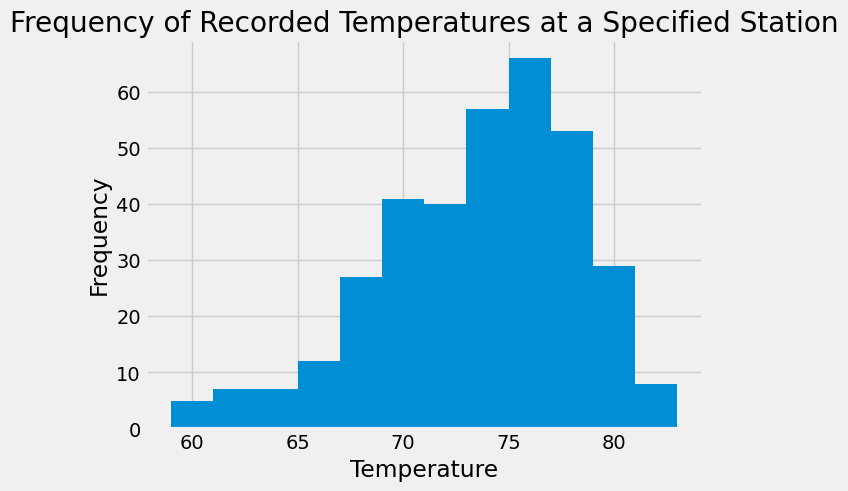

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

past_year_temp = session.query(measurement.date, measurement.tobs).\
    filter((measurement.date >= dt.date(2016, 8 , 23)) & (measurement.station == 'USC00519281')).all()

temperature = [temp[1] for temp in past_year_temp]

plt.hist(temperature, bins=12)
plt.title('Frequency of Recorded Temperatures at a Specified Station')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

In [44]:
    # Query minimum, maximum, and average temperature for the entire last year of data
start_stats = [func.min(measurement.tobs),
                   func.avg(measurement.tobs),
                   func.max(measurement.tobs)]
    
    # Indicate all dates greater than the start date
total_year_temp = session.query(*start_stats).\
                    filter(measurement.date >= dt.date(2016, 8, 23)).all()
    
session.close()
    
    # Print min, avg, and max with their appropriate labels as a dictionary
for min, avg, max in total_year_temp:
        temp_dict = {}
        temp_dict['Minimum Temp'] = min
        temp_dict['Average Temp'] = avg
        temp_dict['Maximum Temp'] = max

temp_dict

{'Minimum Temp': 58.0, 'Average Temp': 74.59058295964125, 'Maximum Temp': 87.0}

# Close Session

In [21]:
# Close Session
session.close()
